**Problem Statement**

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

You need to identify the best possible model that will give the required performance

**Objective**

1. Explore and visualize the dataset.
2. Build a classification model to predict if the customer is going to churn or not
3. Optimize the model using appropriate techniques
4. Generate a set of insights and recommendations that will help the bank

**Data Dictionary:**


*  CLIENTNUM: Client number. Unique identifier for the customer holding the account
*  Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
*  Customer_Age: Age in Years
*  Gender: Gender of the account holder
*  Dependent_count: Number of dependents
*  Education_Level:  Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to a college student), Post-Graduate, Doctorate.
*  Marital_Status: Marital Status of the account holder
*  Income_Category: Annual Income Category of the account holder
*  Card_Category: Type of Card
*  Months_on_book: Period of relationship with the bank
*  Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts between the customer and bank in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: The balance that carries over from one month to the next is the revolving balance
* Avg_Open_To_Buy: Open to Buy refers to the amount left on the credit card to use (Average of last 12 months)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter
* Total_Amt_Chng_Q4_Q1: Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter
* Avg_Utilization_Ratio: Represents how much of the available credit the customer spent

# Import necessary libraries

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

from sklearn.model_selection import (
    train_test_split, 
    StratifiedKFold, 
    cross_val_score, 
    GridSearchCV,
    RandomizedSearchCV
    )


# To be used for missing value imputation
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)

from xgboost import XGBClassifier

from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    confusion_matrix,
    roc_curve,
)

from sklearn import metrics

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To create production pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder




# To supress warnings
import warnings

warnings.filterwarnings("ignore")

# Reading the dataset and Summary

In [ ]:
from google.colab import drive
drive.mount('/content/Mydrive')

Mounted at /content/Mydrive


In [ ]:
df_path = '/content/Mydrive/MyDrive/Python/Data Set/BankChurners.csv'
df_bankChurners = pd.read_csv(df_path)

In [ ]:
print(f'Total number of rows are: {df_bankChurners.shape[0]} and columns are: {df_bankChurners.shape[1]}.')

Total number of rows are: 10127 and columns are: 21.


**Displaying the first and last 5 rows of the dataset**

In [ ]:
df_bankChurners.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000


In [ ]:
df_bankChurners.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.000,1851,2152.000,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,4,2,3,4277.000,2186,2091.000,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.000,0,5409.000,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,4,3,3,5281.000,0,5281.000,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.000,1961,8427.000,0.703,10294,61,0.649,0.189


In [ ]:
# Check the data types of the columns for the dataset.
df_bankChurners.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

* There are 21 columns and 10127 observations in the data set.
* Education_count and Marital_Status columns having less number of observations than the total observations hence values are missing.

In [ ]:
df_bankChurners.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.000,739177606.334,36903783.450,708082083.000,713036770.500,717926358.000,773143533.000,828343083.000
Customer_Age,10127.000,46.326,8.017,26.000,41.000,46.000,52.000,73.000
Dependent_count,10127.000,2.346,1.299,0.000,1.000,2.000,3.000,5.000
Months_on_book,10127.000,35.928,7.986,13.000,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.000,3.813,1.554,1.000,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.000,2.341,1.011,0.000,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.000,2.455,1.106,0.000,2.000,2.000,3.000,6.000
Credit_Limit,10127.000,8631.954,9088.777,1438.300,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.000,1162.814,814.987,0.000,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.000,7469.140,9090.685,3.000,1324.500,3474.000,9859.000,34516.000


* Mean value of the Cusomer_Age is 46.326 and median also 46 . This show that majority of the customers are under 46 year.
* Mean value of the Dependent_count is 2.346 and median is 2 . This show that majoroty of the customers having 2 dependent.
* Mean and median of the Months_on_book is approximate 36 and minimum is 13 months . This show that bank has captured data at least for 13 months.
* Bank having customer's data for minimum of 13 months and minimum transaction count is 10, which shows these customers are not using card so frequently .     

In [ ]:
# Statistical summary of the catagorical variables. 
df_bankChurners.describe(include='object').T

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,8608,6,Graduate,3128
Marital_Status,9378,3,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


* Majority of the existing customers.
* Majority of the bank's customer is female.
* Customer having Blue card category.

In [ ]:
def category_unique_value():
  for cat_cols in (df_bankChurners.select_dtypes(exclude=[np.int64,np.float64]).columns.to_list()):
    print('Feature name: '+ cat_cols)
    print('-'* 50)
    df_cat_count= pd.concat(
          [
      
            df_bankChurners[cat_cols].value_counts(),
            df_bankChurners[cat_cols].value_counts(normalize=True)*100
          ],
          axis = 1
        )
    df_cat_count.columns = ['Count','Percentage']
    
    print(df_cat_count)
    print('\n')
  

In [ ]:
category_unique_value()

Feature name: Attrition_Flag
--------------------------------------------------
                   Count  Percentage
Existing Customer   8500      83.934
Attrited Customer   1627      16.066


Feature name: Gender
--------------------------------------------------
   Count  Percentage
F   5358      52.908
M   4769      47.092


Feature name: Education_Level
--------------------------------------------------
               Count  Percentage
Graduate        3128      36.338
High School     2013      23.385
Uneducated      1487      17.275
College         1013      11.768
Post-Graduate    516       5.994
Doctorate        451       5.239


Feature name: Marital_Status
--------------------------------------------------
          Count  Percentage
Married    4687      49.979
Single     3943      42.045
Divorced    748       7.976


Feature name: Income_Category
--------------------------------------------------
                Count  Percentage
Less than $40K   3561      35.163
$40K - $60K  

* Attrition_Flag column having 83:16 target variables ratio , this shown as data set is imbalanced.
* We have observations with 'abc' from the Income_Category. This consider as unknow catagory and observed that this value can easily replace with $80K - $100K.   

# Data Preprocessing

In [ ]:
# CLIENTNUM is the unique number for each customer, hence we. can easily drop.
df_bankChurners.drop(columns=['CLIENTNUM'],inplace=True) 

In [ ]:
# Replace 'abc' with '$80K - $100K'
df_bankChurners['Income_Category'] = df_bankChurners['Income_Category'].apply(lambda x: '$80K - $100K' if x == 'abc' else x)

# Exploratory Data Analysis

**Univariate analysis**

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

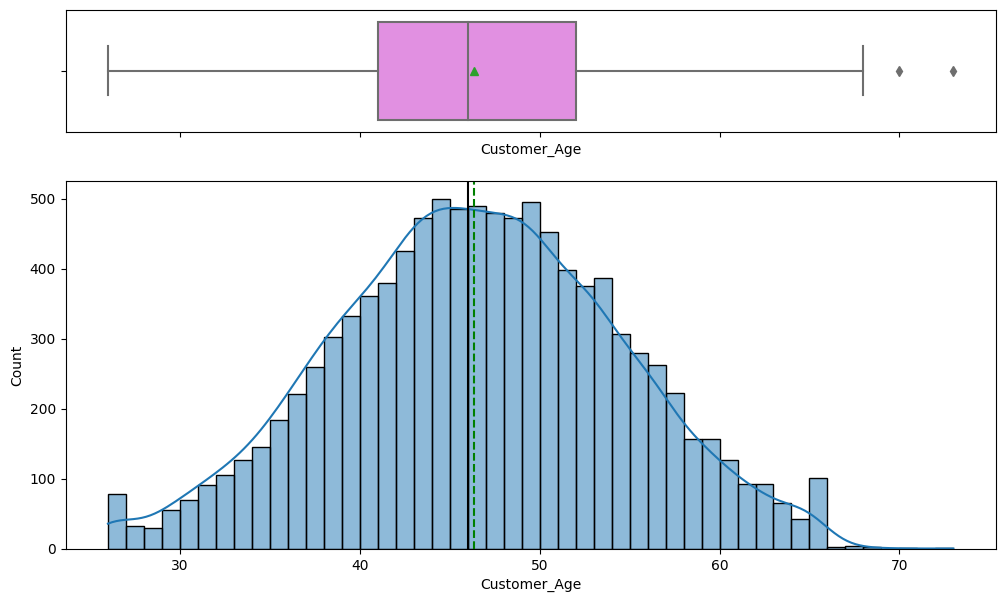

In [ ]:
histogram_boxplot(df_bankChurners,'Customer_Age',kde=True)

* Customer age is normally distributed with two outliers.

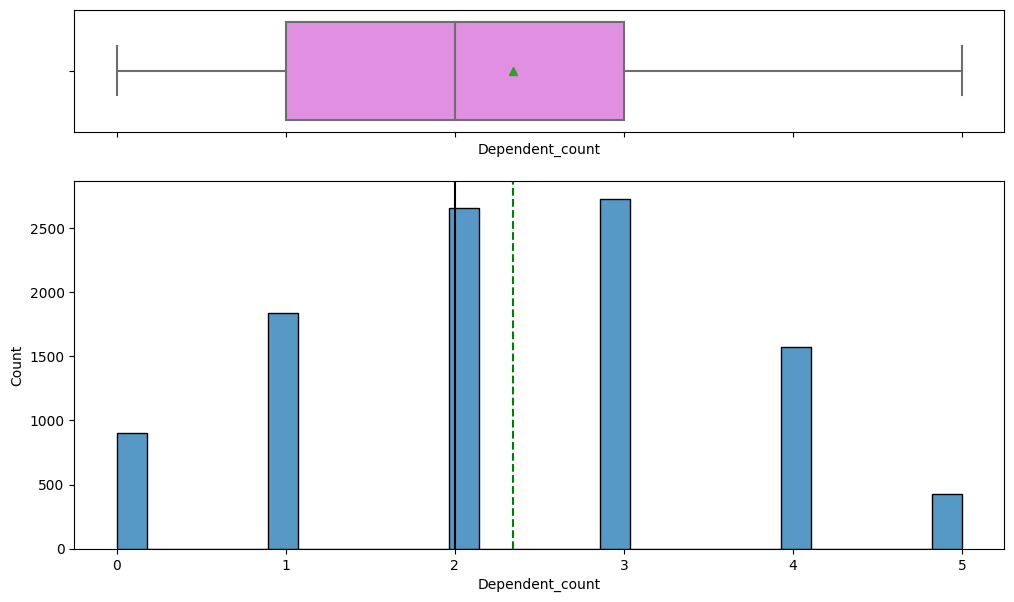

In [ ]:
histogram_boxplot(df_bankChurners,'Dependent_count')

* Dependent_count is discreate and majority of the customers having 2 or 3 dependent. 

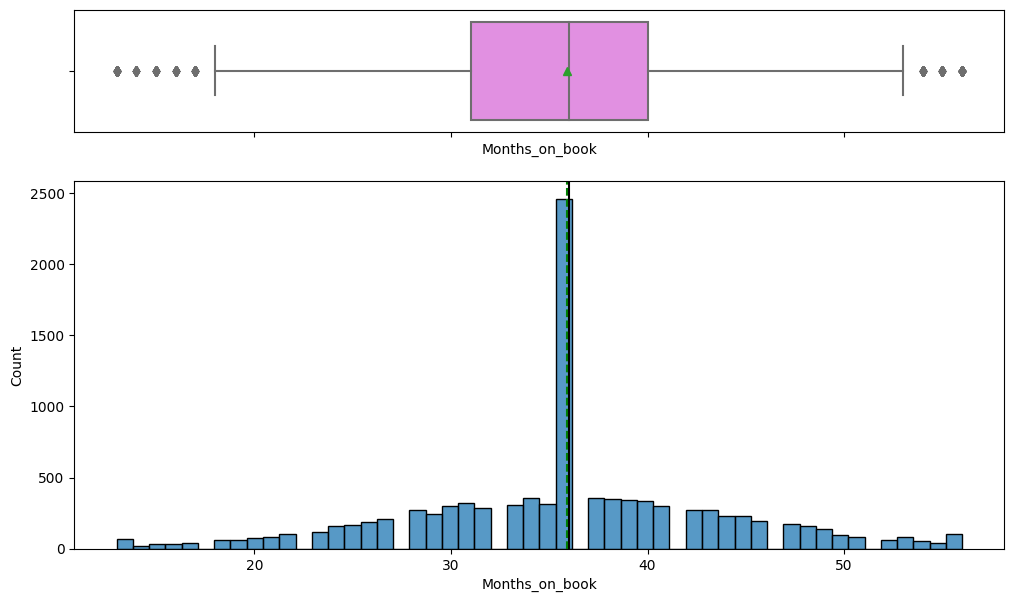

In [ ]:
histogram_boxplot(df_bankChurners,'Months_on_book')

* Majority of the customers with bank are from 36 months.
* There are few outliers which seems like not a true outliers.

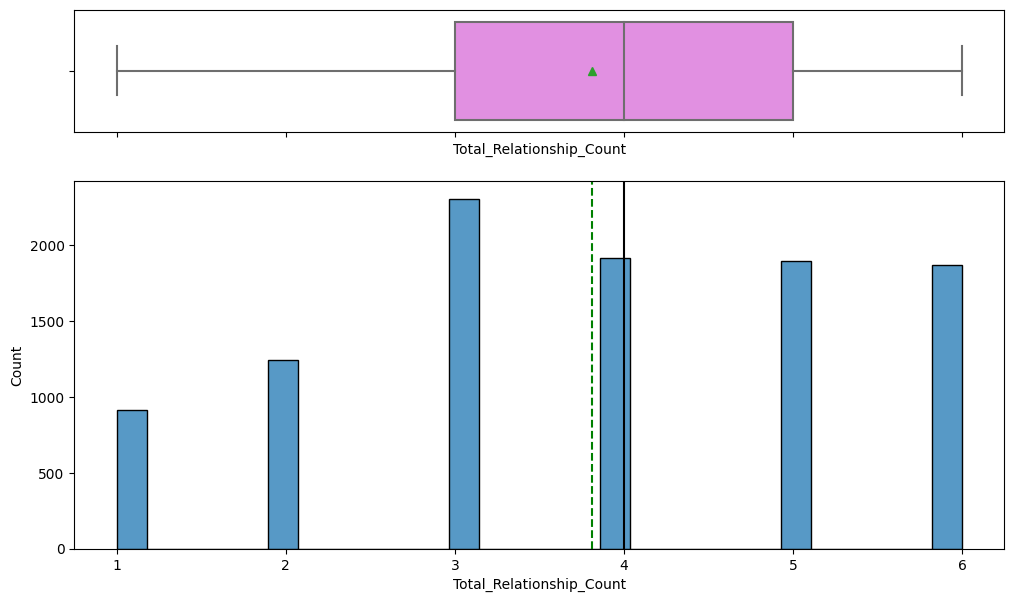

In [ ]:
histogram_boxplot(df_bankChurners,'Total_Relationship_Count')

* Maximum cutomers having 3 bank product.
* Number of customers are equal with having 4,5 and 6 product.

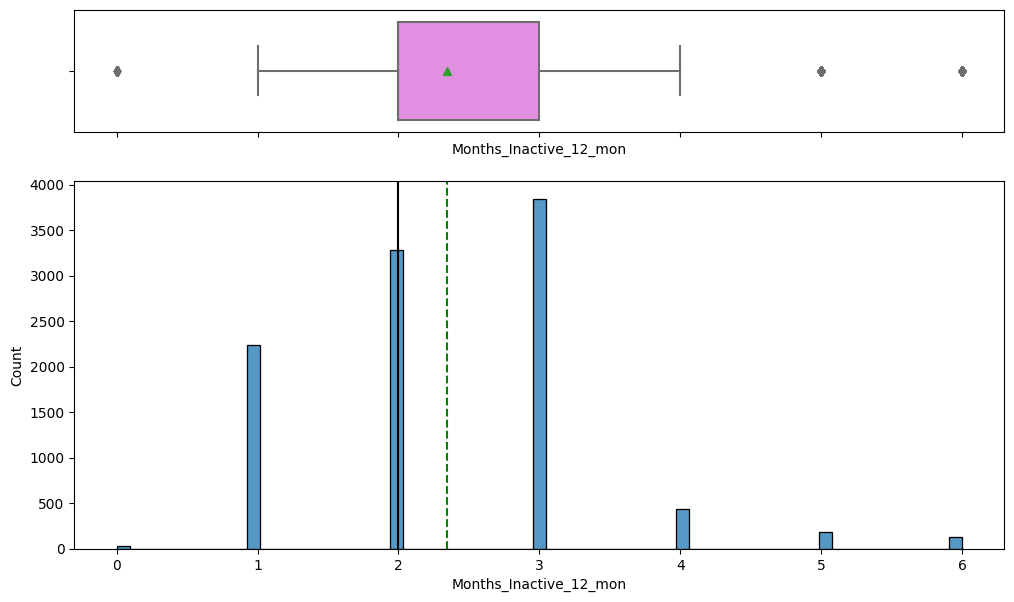

In [ ]:
histogram_boxplot(df_bankChurners,'Months_Inactive_12_mon')

* Customers who are inactive for 5 or more months are to be concerned .
* Bank needs to approcah those customers who are inactive for 3 months.
  

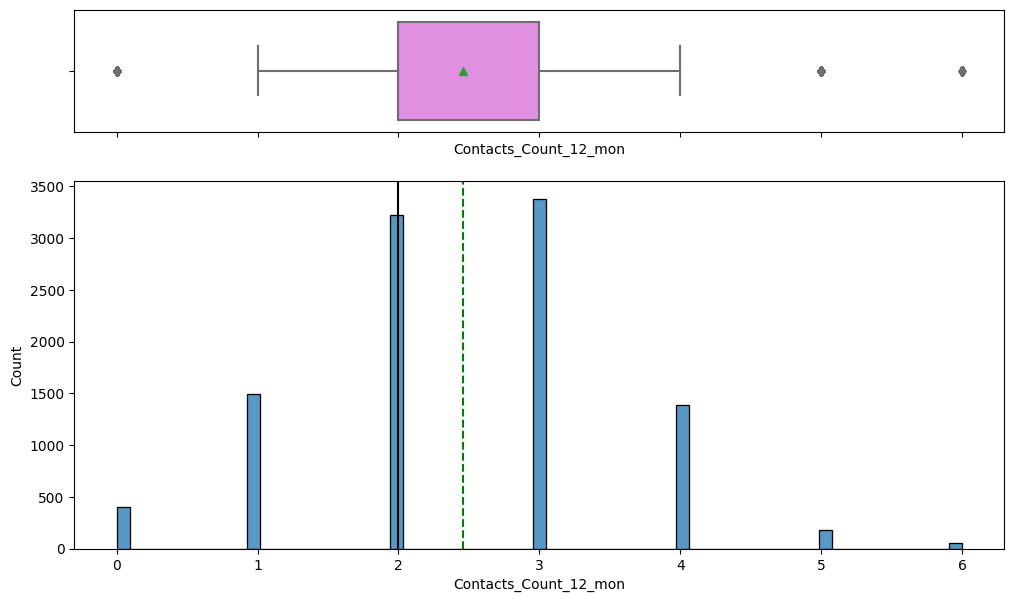

In [ ]:
histogram_boxplot(df_bankChurners,'Contacts_Count_12_mon')

* Lower outlier means no contact between bank and customer hence these customers should be noticed by the bank. 

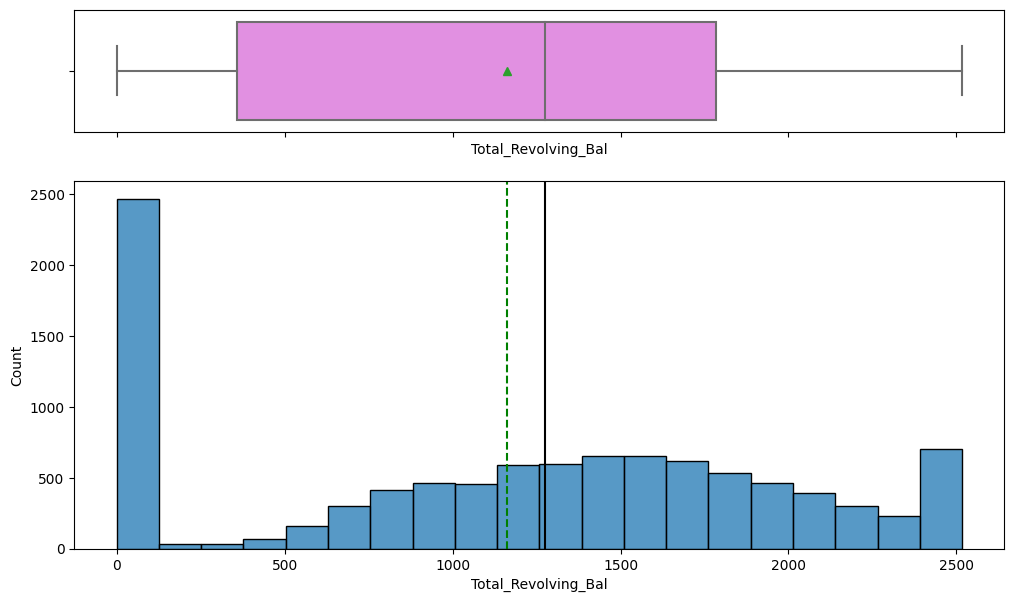

In [ ]:
histogram_boxplot(df_bankChurners,'Total_Revolving_Bal')

* Maximun customers never use the credit cards from the bank.

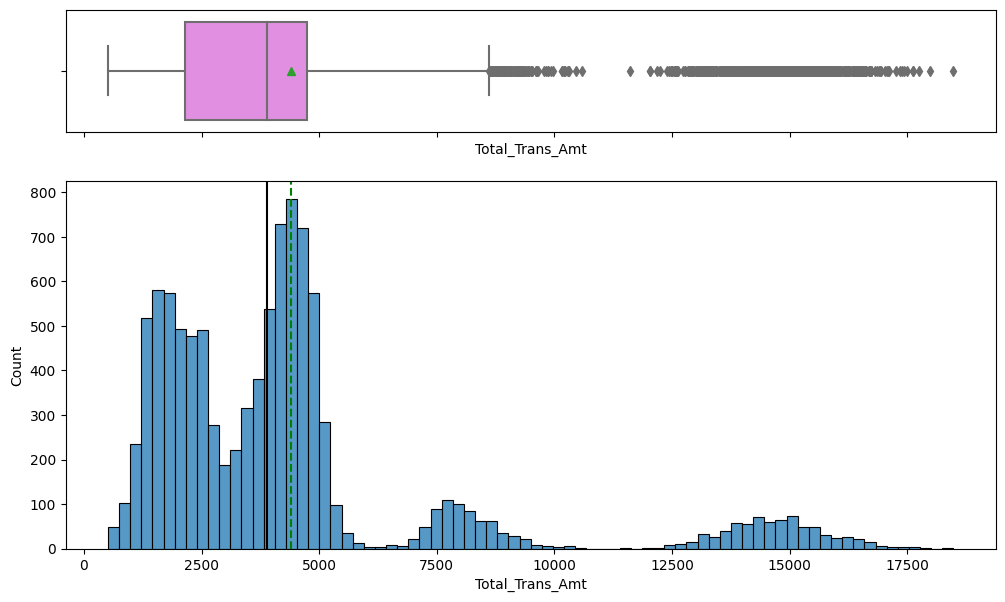

In [ ]:
histogram_boxplot(df_bankChurners,'Total_Trans_Amt')

* There are lot of outliers from right side (rigt skew distribution) 
* Customers can spend more that $8600 in 12 months hence these are not true    outliers to treat.

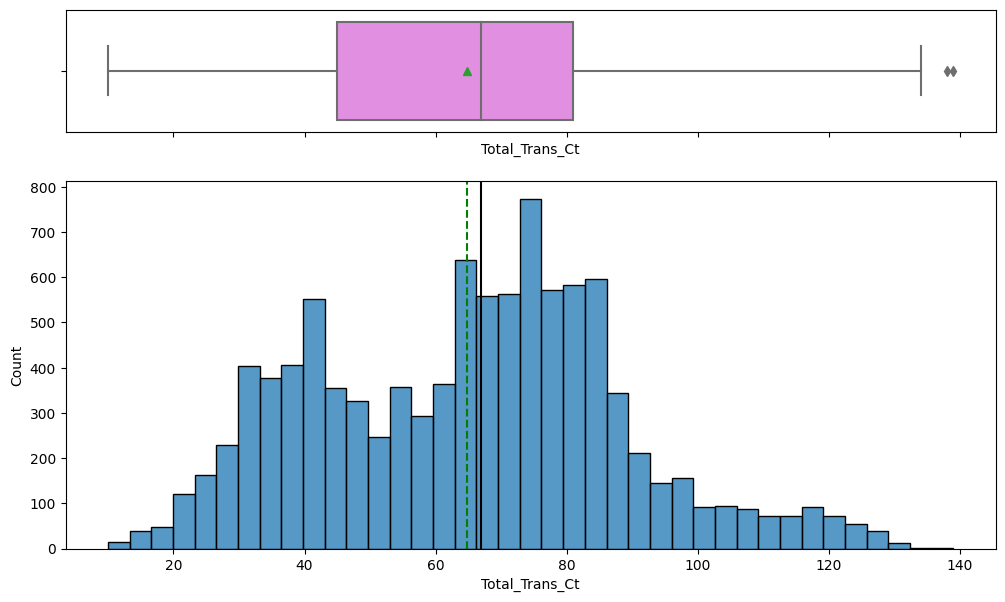

In [ ]:
histogram_boxplot(df_bankChurners,'Total_Trans_Ct')

* Distribution is almost normal with few outliers .
* Customers can do more that 130 transcation per year.hence not consider as true outliers.

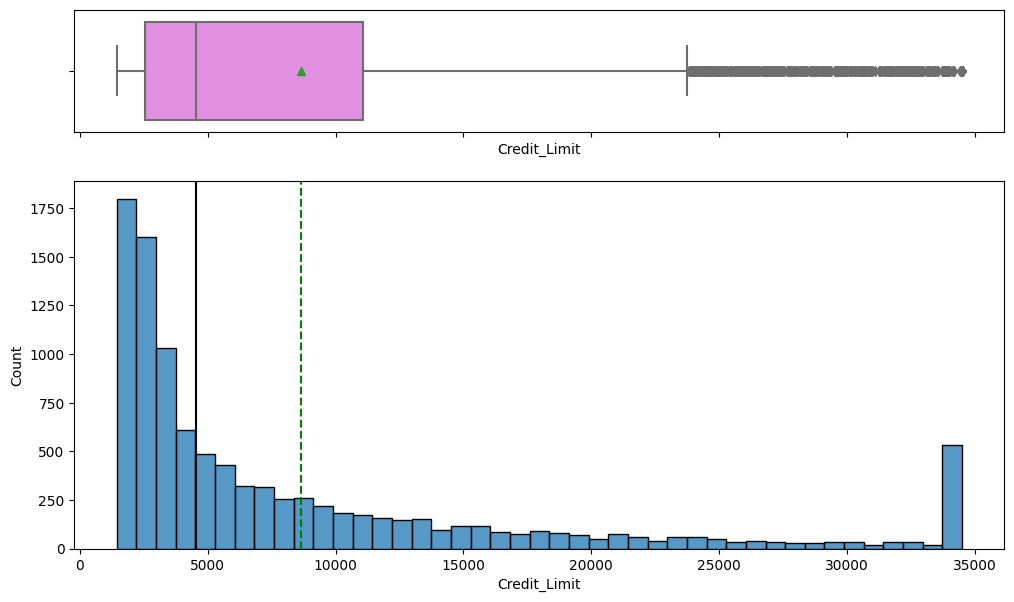

In [ ]:
histogram_boxplot(df_bankChurners,'Credit_Limit')

* Outliers are from high end 

In [ ]:
# Calculate the upper whisker to get the insight from Credit_Limit

Q1 = np.quantile(df_bankChurners['Credit_Limit'], .25)
Q3 = np.quantile(df_bankChurners['Credit_Limit'], .75)

IQR = Q3 - Q1
upper_wishker = Q3 + 1.5*IQR
print('upper_wishker:',+upper_wishker)


upper_wishker: 23836.25


In [ ]:

df_bankChurners.loc[df_bankChurners['Credit_Limit'] > upper_wishker,'Income_Category'].value_counts(normalize=True)


$80K - $120K   0.422
$120K +        0.316
$60K - $80K    0.144
$80K - $100K   0.106
$40K - $60K    0.012
Name: Income_Category, dtype: float64

In [ ]:
df_bankChurners.loc[df_bankChurners['Credit_Limit'] > upper_wishker,'Card_Category'].value_counts(normalize=True)


Blue       0.569
Silver     0.328
Gold       0.086
Platinum   0.016
Name: Card_Category, dtype: float64

* ~90% customers having more than 60K income having credit limit > $23836.

* ~90% customers having Blue or Silver card with credit limit > $23836. 

**Bivariate EDA**

In [ ]:
df_bankChurners['Attrition_Flag'].value_counts(normalize=True)

Existing Customer   0.839
Attrited Customer   0.161
Name: Attrition_Flag, dtype: float64

In [ ]:
# Let's update the target variable(Attrition_Flag) to 0 and 1 :
# 0 -> Existing Customer , 1 -> Attrited Customer

df_bankChurners['Attrition_Flag'] = df_bankChurners['Attrition_Flag'].apply(lambda x: 1 if x == 'Attrited Customer' else 0)

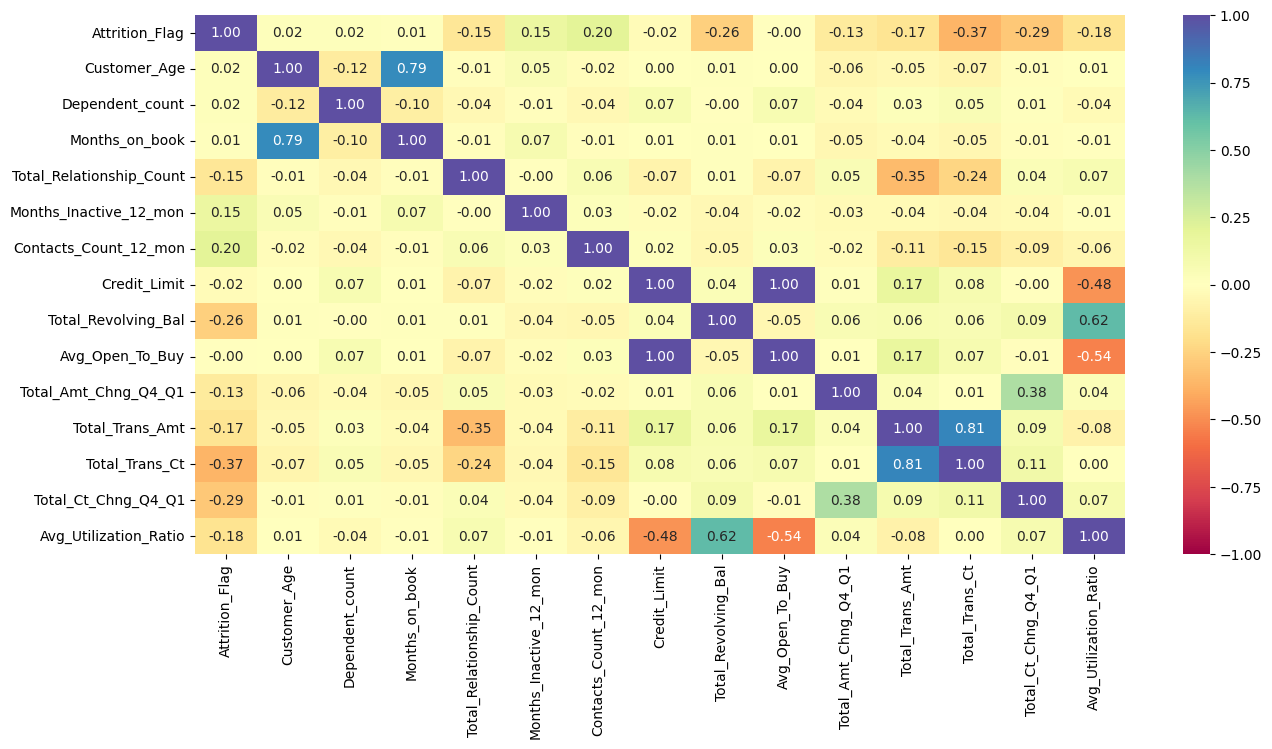

In [ ]:
# Let get the correlation between target and other variables
plt.figure(figsize=(15,7))
df_bankChurners_corr_matrix = df_bankChurners.corr()
sns.heatmap(df_bankChurners_corr_matrix,vmin=-1, vmax=1, cmap='Spectral', annot=True, fmt='.2f');

* Attrition_Age does not showing strong correlation between any numeric variables.
* Credit_Limit and Avg_Open_To_Buy having 100% correlation hence we can easily drop one of variable.
* Customer_Age and Months_on_book showing the strong correlation (79%)
* Customer churn showing as uncorrelated among customer_Age,Dependent_Count,Months_on_book,Credit_Limit and Avg_Open_To_Buy hence we can easily drop these features from data before modeling. 
* Avg_Utilization_Ratio vs Total_Revoling_Bal showing the 62% correlation. 

In [ ]:
# Drop uncorrelated features
df_bankChurners_model = df_bankChurners.drop(['Customer_Age','Dependent_count','Months_on_book','Credit_Limit','Avg_Open_To_Buy'],axis=1)

**Let's check the relationship between target and Categorical variables**

In [ ]:
def boxplot_by_target(data,features,target):
  subplot_cols = 2
  subplot_rows = int(len(df_bankChurners.select_dtypes(exclude='object').columns.to_list())/2 + 1)
  plt.figure(figsize=(16, 3 * subplot_rows))
  for i, feature in enumerate(features):
    plt.subplot(8,2,i+1)
    sns.boxplot(data,
                x=target,
                y=feature,
                orient='vertical',
                showfliers=False 
    )
    plt.tight_layout()  
    plt.title(str(i + 1) + ": " + target + " vs. " + feature, color="black")
        

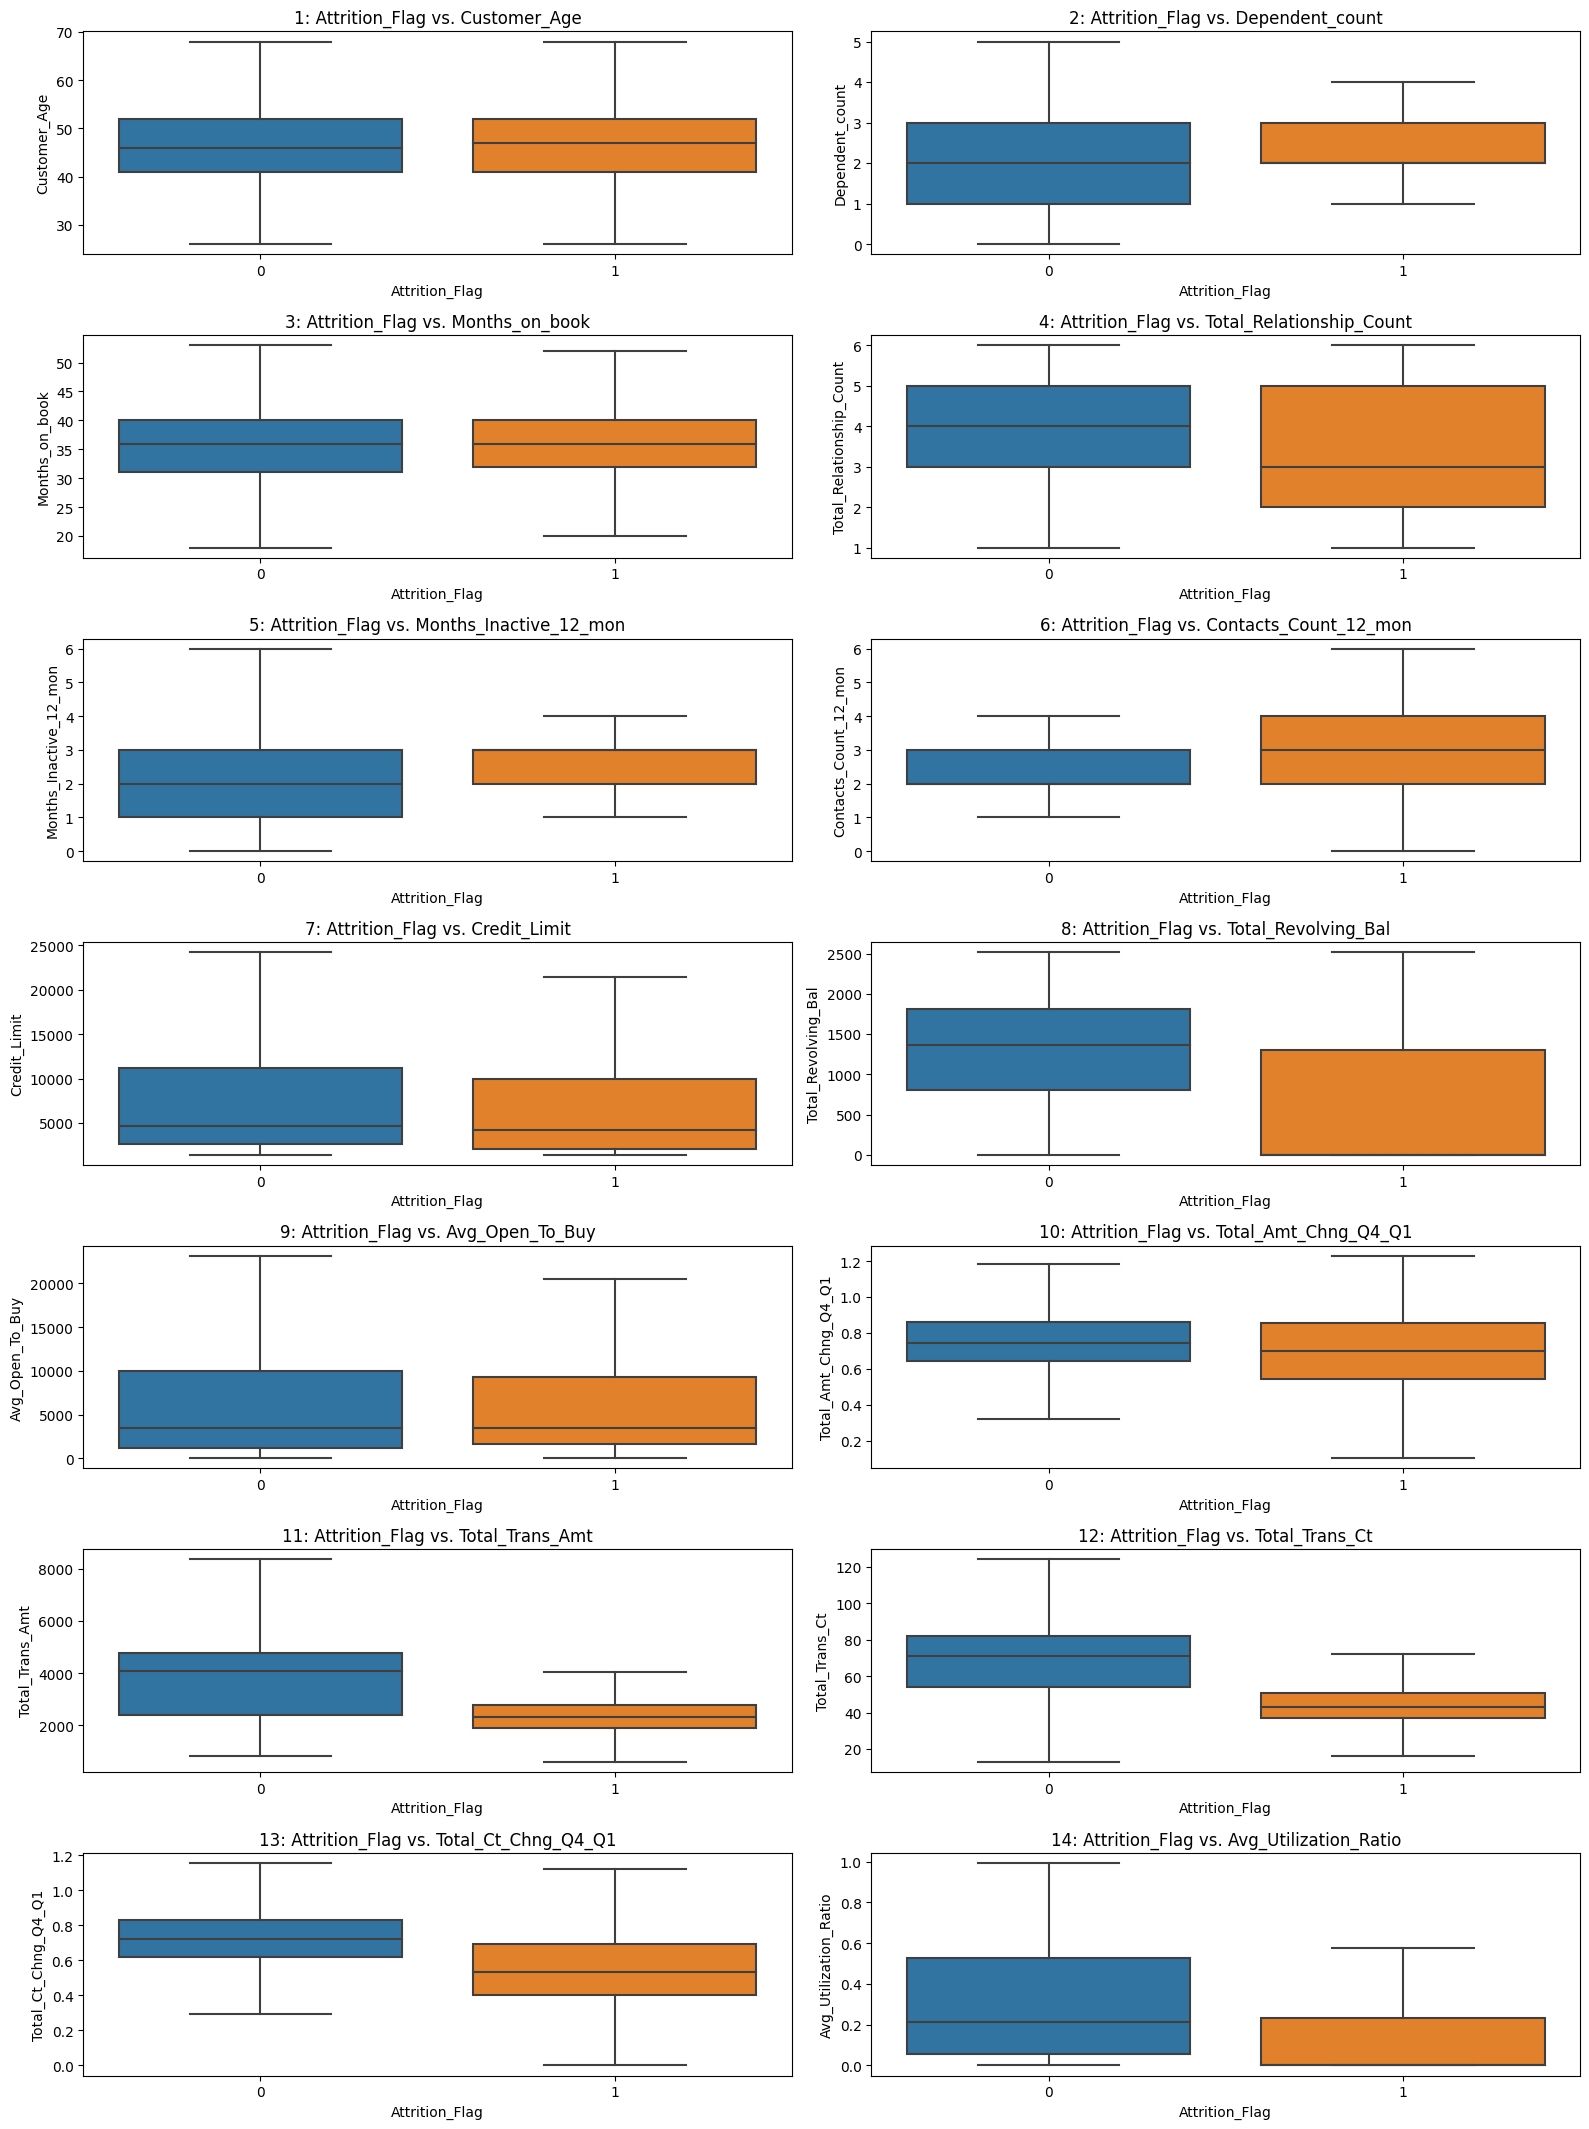

In [ ]:
numeric_cols = df_bankChurners.select_dtypes(exclude='object').columns.to_list() 
boxplot_by_target(df_bankChurners,numeric_cols[1:len(numeric_cols)],'Attrition_Flag')

* Attrited customers have lower total transaction amount, total transaction Ct , total_Ct_Chng_Q4_Q1 and Avg_Utilization_Ratio.
* Attrited customers contracted with bank is high.  

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    #print(tab1)
    #print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

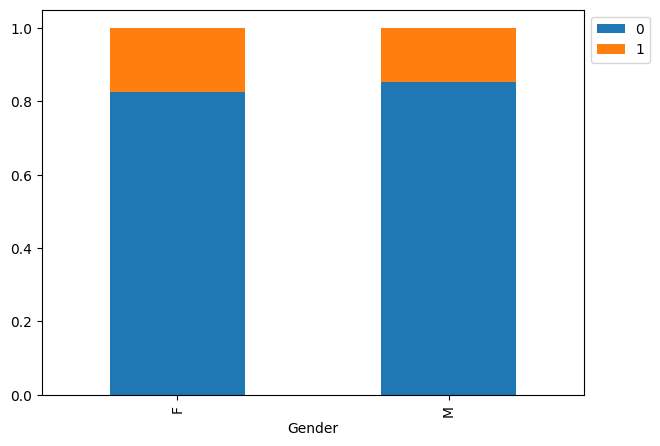

In [ ]:
stacked_barplot(df_bankChurners,'Gender','Attrition_Flag')

* Attrition does not seem to be related with Gender.  

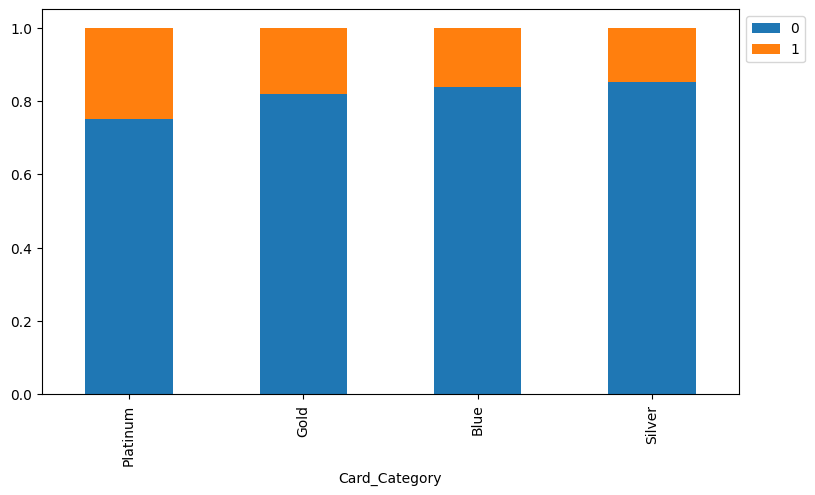

In [ ]:
stacked_barplot(df_bankChurners,'Card_Category','Attrition_Flag')

* Platinum card holder showing the higher attrition flag but data points are very low. This observation would be biased. 

# Data Preparation for Modeling

In [ ]:
X = df_bankChurners_model.drop('Attrition_Flag',axis=1)
y = df_bankChurners['Attrition_Flag']

In [ ]:
# Splitting data into training, validation and test sets: 
# We will use df_bankChurners_model for modeling

X_temp,X_test,y_temp,y_test = train_test_split(X, y, test_size=.2, random_state=1, stratify=y)

X_train,X_val,y_train,y_val = train_test_split(X_temp, y_temp, test_size=.25, random_state=1, stratify=y_temp)

print(X_train.shape, X_val.shape, X_test.shape)

(6075, 14) (2026, 14) (2026, 14)


#  Missing-Value Treatment
*   We will use mode to impute missing values in Education_count and Marital_Status columns.



In [ ]:
# Let's impute the missing values
imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
cols_to_impute = ['Education_Level','Marital_Status']

# fit and transform the imputer on train data
X_train[cols_to_impute] = imp_mode.fit_transform(X_train[cols_to_impute])

# Transform on validation and test data
X_val[cols_to_impute] = imp_mode.transform(X_val[cols_to_impute])
X_test[cols_to_impute] = imp_mode.transform(X_test[cols_to_impute])

In [ ]:
# Convert object dbtype to categorical dbtype
categorical_cols = df_bankChurners_model.select_dtypes(include='object').columns.to_list()
df_bankChurners_model[categorical_cols] = df_bankChurners_model[categorical_cols].astype('category')

In [ ]:
# Creating dummy variables for categorical variables
X_train = pd.get_dummies(X_train,drop_first=True)
X_val = pd.get_dummies(X_val,drop_first=True)
X_test = pd.get_dummies(X_test,drop_first=True)

# Model evaluation criterion


**The model can make wrong predictions as:**
  * Model predict that customer will leave the credit card service but actual customer would not leave the service - Loss of money  

  * Model predict that customer will not leave the credit card service but actually customer will leave the service - Loss of resources

**Which case is more important?**
 * Problem statement is about to find out the customers ,going to leave the credit card services hence model should not predict the customers those are definetly leave the service.   

**Which metric to optimize?**
 * Company wants recall to be maximized i.e. we need to reduce the number of false negatives.

# Model Building and Hyperparameter Tuning

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(('dTree', DecisionTreeClassifier(random_state=1)))
models.append(('Random forest', RandomForestClassifier(random_state=1)))
models.append(('Bagging', BaggingClassifier(random_state=1)))
models.append(('AdaBoost', AdaBoostClassifier(random_state=1)))
models.append(('GBM',GradientBoostingClassifier(random_state=1)))
models.append(('xgBoost',XGBClassifier(random_state=1)))

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models
scores = []
print("\n" "Cross-Validation Performance:" "\n")
# loop through all models to get the mean cross validated score
for name,model in models:
  scoring = 'recall'
  kfold = StratifiedKFold(
      n_splits=5,
      shuffle=True,
      random_state=1
  )
  cv_result = cross_val_score(
      estimator=model,
      X = X_train,
      y = y_train,
      scoring = scoring,
      cv = kfold
  )
  results.append(cv_result)
  names.append(name)
  print(f'{name}: {cv_result.mean()*100}')



Cross-Validation Performance:

dTree: 77.66248037676608
Random forest: 78.07326007326007
Bagging: 78.89010989010987
AdaBoost: 80.42647828362114
GBM: 80.83621140764
xgBoost: 84.1156462585034


In [ ]:
print("Validation Performance:" "\n")
for name,model in models:
  model.fit(X_train,y_train)
  score = recall_score(y_val, model.predict(X_val))
  scores.append(score)
  print(f'{name}: {score}')


Validation Performance:

dTree: 0.7944785276073619
Random forest: 0.8159509202453987
Bagging: 0.8220858895705522
AdaBoost: 0.8496932515337423
GBM: 0.8650306748466258
xgBoost: 0.8680981595092024


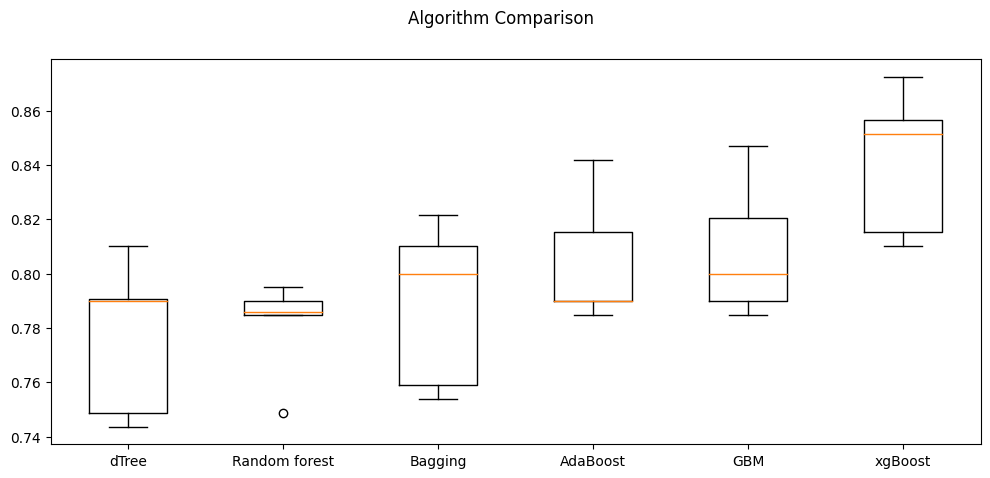

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(12,5))
fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)
ax.set_xticklabels(names)
plt.boxplot(results);
plt.show()



* We can see that the xgBoost is giving the highest cross-validated recall followed by GradientBoosting then AdaBoost.
* The boxplot shows that the performance of xgBoost and GradientBoosting is consistent and their performance on the validation set is also good.
* We will tune the best three models i.e. xgBoost, GradientBoosting and AdaBoost and see if the performance improves.

# Hyperparameter Tuning
* We will tune xgBoost and GradientBoosting models using GridSearchCV and RandomizedSearchCV

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

**XGBoost - GridSearchCV**

In [ ]:
# Define the model
xgboost_tuned = XGBClassifier(random_state=1)

#Parameter grid to pass in GridSearchCV
param_grid={'n_estimators':np.arange(50,150,50),
            'learning_rate':[0.1],
            'max_depth':np.arange(1,5,1),
            'scale_pos_weight':[2,5,10],
            'subsample':[i/10.0 for i in range(6,10)],
            'colsample_bytree':[i/10.0 for i in range(6,10)]
            }

# Type of scoring used to comapre parameter combinations
score = metrics.make_scorer(metrics.recall_score)
grid_cv = GridSearchCV(
    estimator=xgboost_tuned,
    param_grid = param_grid,
    scoring = score,
    cv = 5,
    n_jobs= -1,
    verbose= 2
)  
grid_cv.fit(X_train,y_train)   


Fitting 5 folds for each of 384 candidates, totalling 1920 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=1, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
                         'learning_rate': [0.1],
                         'max_depth': array([1, 2, 3, 4]),
                         'n_estimators': array([ 50, 100]),
                         'scale_pos_weight': [2, 5, 10],
                         'subsample': [0.6, 0.7, 0.8, 0.9]},
             scoring=make_scorer(recall_score), verbose=2)

In [18]:
print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))
xgboost_tuned = grid_cv.best_estimator_

Best parameters are {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100, 'scale_pos_weight': 10, 'subsample': 0.8} with CV score=0.973338566195709:


In [19]:
xgboost_tuned_train = model_performance_classification_sklearn(xgboost_tuned,X_train,y_train)
print("Training performance:")
xgboost_tuned_train


Training performance:


,Accuracy,Recall,Precision,F1
0,0.896,0.983,0.609,0.752


In [20]:
xgboost_tuned_val = model_performance_classification_sklearn(xgboost_tuned,X_val,y_val)
print("Validation performance:")
xgboost_tuned_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.895,0.982,0.608,0.751


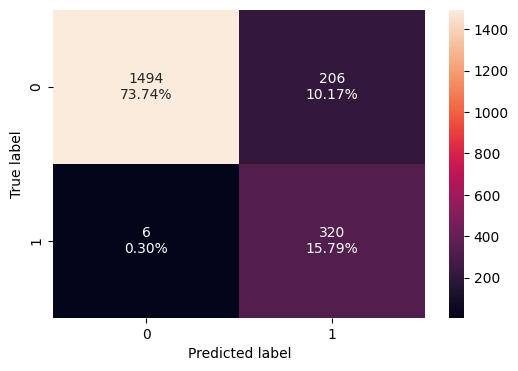

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn(xgboost_tuned, X_val, y_val)

* Validation score has increased as compared to the result from cross validation with default parameters.
* Model is giving the generalized performance.
* Model is predicting the most of the customers which attrite.  

**XGBoost - RandomizedSearchCV**

In [ ]:
# Define the model
rs_xgboost_tuned = XGBClassifier(random_state=1)

#Parameter grid to pass in GridSearchCV
param_grid={'n_estimators':np.arange(50,150,50),
            'learning_rate':[0.1],
            'subsample':[0.8,0.9,1],
            'max_depth':np.arange(1,5,1),
            'scale_pos_weight':[2,5,10],
            'colsample_bytree':[i/10.0 for i in range(6,10)]
            }

# Type of scoring used to comapre parameter combinations
score = metrics.make_scorer(metrics.recall_score)
randomized_cv = RandomizedSearchCV(
    estimator=rs_xgboost_tuned,
    param_distributions = param_grid,
    n_iter=50,
    scoring = score,
    cv = 5,
    n_jobs= -1,
    verbose= 2
)  
randomized_cv.fit(X_train,y_train)  

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=1, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8,
                                                             0.9],
                                        'learning_rate': [0.1],
                                        'max_depth': array([1, 2, 3, 4]),
                                        'n_estimators': array([ 50, 100]),
                                        'scale_pos_weight': [2, 5, 10],
                                        'subsample': [0.8, 0.9, 1]},
                   scoring=make_scorer(recall_score), verbose=2)

In [ ]:
rs_xgboost_tuned = randomized_cv.best_estimator_

In [ ]:
print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.8, 'scale_pos_weight': 10, 'n_estimators': 50, 'max_depth': 2, 'learning_rate': 0.1, 'colsample_bytree': 0.6} with CV score=0.9712925170068027:


In [ ]:
rs_xgboost_tuned_train = model_performance_classification_sklearn(rs_xgboost_tuned,X_train,y_train)
print("Training performance:")
rs_xgboost_tuned_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.842,0.987,0.505,0.668


In [ ]:
rs_xgboost_tuned_val = model_performance_classification_sklearn(rs_xgboost_tuned,X_val,y_val)
print("Validation performance:")
rs_xgboost_tuned_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.835,0.975,0.494,0.656


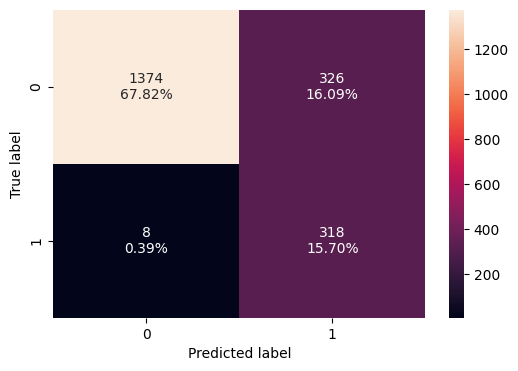

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn(rs_xgboost_tuned, X_val, y_val)

* Model performance slightly decreased compared to GridSearchCV.   

**GradientBoosting - GridSearchCV**

In [ ]:
gbm_tuned = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in GridSearchCV
param_grid={'n_estimators':np.arange(50,150,50),
            'learning_rate':[0.1],
            'max_depth':np.arange(1,10,1),
            'max_features' : ['sqrt']
            }

# Type of scoring used to comapre parameter combinations
score = metrics.make_scorer(metrics.recall_score)
grid_cv = GridSearchCV(
    estimator=gbm_tuned,
    param_grid = param_grid,
    scoring = score,
    cv = 5,
    n_jobs= -1,
    verbose= 2
)  
grid_cv.fit(X_train,y_train)   


Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=1),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['sqrt'],
                         'n_estimators': array([ 50, 100])},
             scoring=make_scorer(recall_score), verbose=2)

In [ ]:
print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))

Best parameters are {'learning_rate': 0.1, 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 100} with CV score=0.8196807953950811:


In [ ]:
# Tuned the model with hyperparameter tuning
gbm_tuned = grid_cv.best_estimator_

In [ ]:
gbm_tuned_train = model_performance_classification_sklearn(gbm_tuned,X_train,y_train)
print("Training performance:")
gbm_tuned_train

Training performance:


,Accuracy,Recall,Precision,F1
0,1.000,1.000,1.000,1.000


In [ ]:
gbm_tuned_val = model_performance_classification_sklearn(gbm_tuned,X_val,y_val)
print("Validation performance:")
gbm_tuned_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.968,0.865,0.931,0.897


**GradientBoosting - RandomizedSearchCV** 

In [ ]:
rs_gbm_tuned = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in GridSearchCV
param_grid={'n_estimators':np.arange(50,150,50),
            'learning_rate':[0.1],
            'max_depth':np.arange(1,10,1),
            'max_features' : ['sqrt']
            }

# Type of scoring used to comapre parameter combinations
score = metrics.make_scorer(metrics.recall_score)
randomized_cv = RandomizedSearchCV(
    estimator=rs_gbm_tuned,
    param_distributions = param_grid,
    scoring = score,
    n_iter=50,
    cv = 5,
    n_jobs= -1,
    verbose= 2
)  
randomized_cv.fit(X_train,y_train)   


Fitting 5 folds for each of 18 candidates, totalling 90 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=1),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'learning_rate': [0.1],
                                        'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'max_features': ['sqrt'],
                                        'n_estimators': array([ 50, 100])},
                   scoring=make_scorer(recall_score), verbose=2)

In [ ]:
rs_gbm_tuned = randomized_cv.best_estimator_

In [ ]:
rs_gbm_tuned_train = model_performance_classification_sklearn(rs_gbm_tuned,X_train,y_train)
print("Training performance:")
rs_gbm_tuned_train

Training performance:


,Accuracy,Recall,Precision,F1
0,1.000,1.000,1.000,1.000


In [ ]:
rs_gbm_tuned_val = model_performance_classification_sklearn(rs_gbm_tuned,X_val,y_val)
print("Validation performance:")
rs_gbm_tuned_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.968,0.865,0.931,0.897


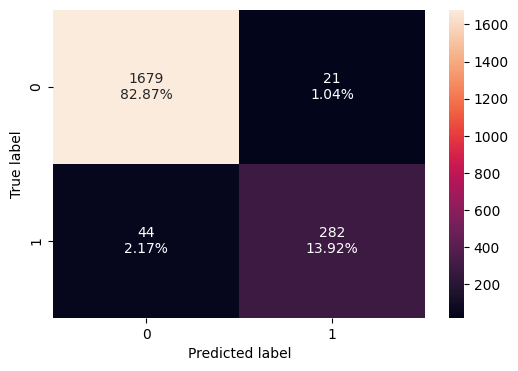

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn(rs_gbm_tuned, X_val, y_val)

* Model is giving the same performance in GridSearchCV and RandomizedSearchCV.
* Model is overfitting the data.

**AdaBoost - GridSearchCV**

In [ ]:
adaBoost_tuned = AdaBoostClassifier(random_state=1)

#Parameter grid to pass in GridSearchCV
param_grid={'n_estimators':np.arange(50,150,50),
            'learning_rate':[0.01,0.1,0.2,0.05]
            }

# Type of scoring used to comapre parameter combinations
score = metrics.make_scorer(metrics.recall_score)
grid_cv = GridSearchCV(
    estimator=adaBoost_tuned,
    param_grid = param_grid,
    scoring = score,
    cv = 5,
    n_jobs= -1,
    verbose= 2
)  
grid_cv.fit(X_train,y_train)   

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=1), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2, 0.05],
                         'n_estimators': array([ 50, 100])},
             scoring=make_scorer(recall_score), verbose=2)

In [ ]:
#Define the model with hyperparameters tuning
adaBoost_tuned = grid_cv.best_estimator_

In [ ]:
print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))

Best parameters are {'learning_rate': 0.2, 'n_estimators': 100} with CV score=0.6813134484563056:


In [ ]:
adaBoost_tuned_train = model_performance_classification_sklearn(adaBoost_tuned,X_train,y_train)
print('Training performance')
adaBoost_tuned_train

Training performance


,Accuracy,Recall,Precision,F1
0,0.942,0.701,0.918,0.795


In [ ]:
adaBoost_tuned_val = model_performance_classification_sklearn(adaBoost_tuned,X_val,y_val)
print('Validation performance')
adaBoost_tuned_val

Validation performance


,Accuracy,Recall,Precision,F1
0,0.950,0.739,0.938,0.827


**AdaBoost - RandomizedSearchCV**

In [ ]:
rs_adaBoost_tuned = AdaBoostClassifier(random_state=1)

#Parameter grid to pass in GridSearchCV
param_grid={'n_estimators':np.arange(50,150,50),
            'learning_rate':[0.01,0.1,0.2,0.05]
            }

# Type of scoring used to comapre parameter combinations
score = metrics.make_scorer(metrics.recall_score)
randomized_cv = RandomizedSearchCV(
    estimator=rs_adaBoost_tuned,
    param_distributions = param_grid,
    scoring = score,
    cv = 5,
    n_iter=50,
    n_jobs= -1,
    verbose= 2
)  
randomized_cv.fit(X_train,y_train)  

Fitting 5 folds for each of 8 candidates, totalling 40 fits


RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=1),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2, 0.05],
                                        'n_estimators': array([ 50, 100])},
                   scoring=make_scorer(recall_score), verbose=2)

In [ ]:
rs_adaBoost_tuned = randomized_cv.best_estimator_

In [ ]:
rs_adaBoost_tuned_train = model_performance_classification_sklearn(rs_adaBoost_tuned,X_train,y_train)
print('Training Performace')
rs_adaBoost_tuned_train

Training Performace


,Accuracy,Recall,Precision,F1
0,0.942,0.701,0.918,0.795


In [ ]:
rs_adaBoost_tuned_val = model_performance_classification_sklearn(rs_adaBoost_tuned,X_val,y_val)
print('Validation Performace')
rs_adaBoost_tuned_val

Validation Performace


,Accuracy,Recall,Precision,F1
0,0.950,0.739,0.938,0.827


* Model is giving the same performance in GridSearchCV and RandomizedSearchCV.
* Model is overfitting the data.

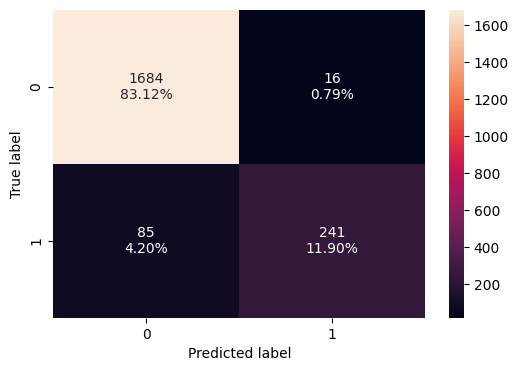

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn(rs_adaBoost_tuned, X_val, y_val)

In [ ]:
models_train_comp_df = pd.concat(
    [
        xgboost_tuned_train.T,
        rs_xgboost_tuned_train.T,
        gbm_tuned_train.T,
        rs_xgboost_tuned_train.T,
        adaBoost_tuned_train.T,
        rs_adaBoost_tuned_train.T
    ],
    axis = 1,
)
models_train_comp_df.columns = [
    'XGBoost - Grid Search',
    'XGBoost - Random Search',
    'GBM - Grid Search',
    'GBM - Random Search',
    'AdaBoost - Grid Search',
    'AdaBoost - Random Search'
]    


Training performance comparison:


,XGBoost - Grid Search,XGBoost - Random Search,GBM - Grid Search,GBM - Random Search,AdaBoost - Grid Search,AdaBoost - Random Search
Accuracy,0.896,0.842,1.000,0.842,0.942,0.942
Recall,0.983,0.987,1.000,0.987,0.701,0.701
Precision,0.609,0.505,1.000,0.505,0.918,0.918
F1,0.752,0.668,1.000,0.668,0.795,0.795


In [ ]:
models_val_comp_df = pd.concat(
    [
        xgboost_tuned_val.T,
        rs_xgboost_tuned_val.T,
        gbm_tuned_val.T,
        rs_xgboost_tuned_val.T,
        adaBoost_tuned_val.T,
        rs_adaBoost_tuned_val.T
    ],
    axis = 1,
)
models_val_comp_df.columns = [
    'XGBoost - Grid Search',
    'XGBoost - Random Search',
    'GBM - Grid Search',
    'GBM - Random Search',
    'AdaBoost - Grid Search',
    'AdaBoost - Random Search'
]    


In [ ]:
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,XGBoost - Grid Search,XGBoost - Random Search,GBM - Grid Search,GBM - Random Search,AdaBoost - Grid Search,AdaBoost - Random Search
Accuracy,0.896,0.842,1.000,0.842,0.942,0.942
Recall,0.983,0.987,1.000,0.987,0.701,0.701
Precision,0.609,0.505,1.000,0.505,0.918,0.918
F1,0.752,0.668,1.000,0.668,0.795,0.795


In [ ]:

print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,XGBoost - Grid Search,XGBoost - Random Search,GBM - Grid Search,GBM - Random Search,AdaBoost - Grid Search,AdaBoost - Random Search
Accuracy,0.895,0.835,0.968,0.835,0.950,0.950
Recall,0.982,0.975,0.865,0.975,0.739,0.739
Precision,0.608,0.494,0.931,0.494,0.938,0.938
F1,0.751,0.656,0.897,0.656,0.827,0.827


* We can see that XGBoost - Grid Search is giving the best performance compared to other models (XGB and AdaBoost) and generalized result.

# Model building - Oversampled data

In [ ]:
print(f'Before upsampling counts of YES (Attried Customer): {sum(y_train == 1)}')
print(f'Before upsampling counts of NO (Existing Customer): {sum(y_train == 0)}')

sm = SMOTE(
    sampling_strategy='minority',
    k_neighbors=10,
    random_state =1
)
X_train_over,y_train_over = sm.fit_resample(X_train,y_train)

print('\n')
print(f'After upsampling counts of YES (Attried Customer): {sum(y_train_over == 1)}')
print(f'After upsampling counts of NO (Existing Customer): {sum(y_train_over == 0)}')


Before upsampling counts of YES (Attried Customer): 976
Before upsampling counts of NO (Existing Customer): 5099


After upsampling counts of YES (Attried Customer): 5099
After upsampling counts of NO (Existing Customer): 5099


In [ ]:
models_over = []  # Empty list to store all the models

# Appending models into the list
models_over.append(('dTree', DecisionTreeClassifier(random_state=1)))
models_over.append(('Random forest', RandomForestClassifier(random_state=1)))
models_over.append(('Bagging', BaggingClassifier(random_state=1)))
models_over.append(('AdaBoost', AdaBoostClassifier(random_state=1)))
models_over.append(('GBM',GradientBoostingClassifier(random_state=1)))
models_over.append(('xgBoost',XGBClassifier(random_state=1)))

results_over = []  # Empty list to store all model's CV scores
names_over = []  # Empty list to store name of the models
scores_over = []
print("\n" "Cross-Validation Performance:" "\n")
# loop through all models to get the mean cross validated score
for name,model in models_over:
  scoring = 'recall'
  kfold = StratifiedKFold(
      n_splits=5,
      shuffle=True,
      random_state=1
  )
  cv_result = cross_val_score(
      estimator=model,
      X = X_train_over,
      y = y_train_over,
      scoring = scoring,
      cv = kfold
  )
  results_over.append(cv_result)
  names_over.append(name)
  print(f'{name}: {cv_result.mean()*100}')

print("\n")
print("Validation Performance:" "\n")
for name,model in models_over:
  model.fit(X_train_over,y_train_over)
  score = recall_score(y_val, model.predict(X_val))
  scores_over.append(score)
  print(f'{name}: {score}')



Cross-Validation Performance:

dTree: 94.80278627643402
Random forest: 97.99969212415093
Bagging: 96.4502684292559
AdaBoost: 96.46993399911486
GBM: 97.27404799014798
xgBoost: 98.21543612538242


Validation Performance:

dTree: 0.8466257668711656
Random forest: 0.8711656441717791
Bagging: 0.8834355828220859
AdaBoost: 0.9049079754601227
GBM: 0.901840490797546
xgBoost: 0.8957055214723927


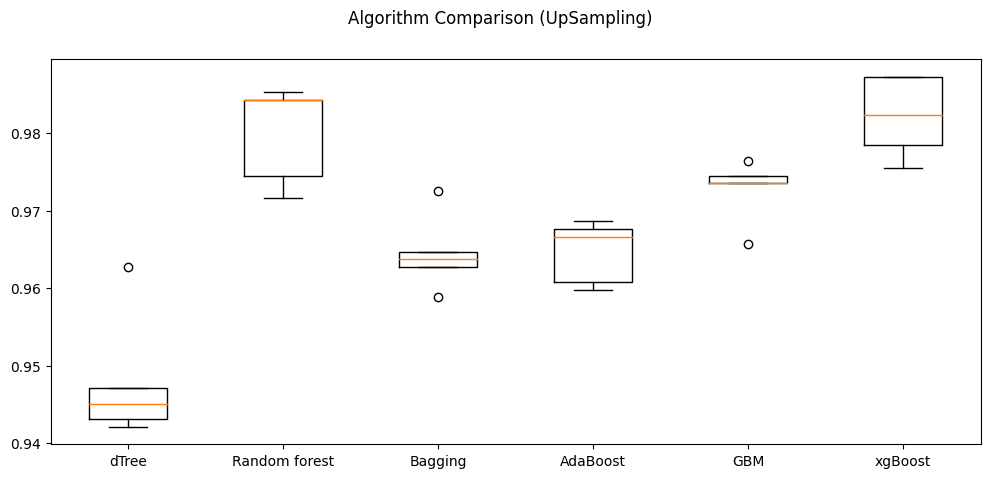

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(12,5))
fig.suptitle("Algorithm Comparison (UpSampling)")
ax = fig.add_subplot(111)
ax.set_xticklabels(names_over)
plt.boxplot(results_over);
plt.show()

* Some of the algorithm showing the outliers hence considering only below models for further evolution 
  * XGBoost
  * Random Forest
  * AdaBoost
* Let check the performance on train (oversample) and validation data set .  

In [ ]:
xgboost_over = XGBClassifier(random_state=1)
xgboost_over.fit(X_train_over,y_train_over)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1, ...)

In [ ]:
xgboost_over_train = model_performance_classification_sklearn(xgboost_over,X_train_over,y_train_over)
print('Training Performance (UpSample)')
xgboost_over_train

Training Performance (UpSample)


,Accuracy,Recall,Precision,F1
0,1.000,1.000,1.000,1.000


In [ ]:
xgboost_over_val = model_performance_classification_sklearn(xgboost_over,X_val,y_val)
print('Validation Performance (UpSample)')
xgboost_over_val

Validation Performance (UpSample)


,Accuracy,Recall,Precision,F1
0,0.968,0.896,0.907,0.901


In [ ]:
random_forest_over = RandomForestClassifier(random_state=1)
random_forest_over.fit(X_train_over,y_train_over)

RandomForestClassifier(random_state=1)

In [ ]:
# check the training performance
random_forest_over_train = model_performance_classification_sklearn(random_forest_over,X_train_over,y_train_over)
print('Training Performance (UpSample)')
random_forest_over_train


Training Performance (UpSample)


,Accuracy,Recall,Precision,F1
0,1.000,1.000,1.000,1.000


In [ ]:
# check the validation performance
random_forest_over_val = model_performance_classification_sklearn(random_forest_over,X_val,y_val)
print('Validation Performance (UpSample)')
random_forest_over_val

Validation Performance (UpSample)


,Accuracy,Recall,Precision,F1
0,0.955,0.871,0.853,0.862


In [ ]:
# Fit the model with upsampling dataset
adaBoost_over = AdaBoostClassifier(random_state=1)
adaBoost_over.fit(X_train_over,y_train_over)

# check the training performance
adaBoost_over_train = model_performance_classification_sklearn(adaBoost_over,X_train_over,y_train_over)

print('Training Performance')
adaBoost_over_train

Training Performance


,Accuracy,Recall,Precision,F1
0,0.962,0.967,0.957,0.962


In [ ]:
# Check the Validation Performance
adaBoost_over_val = model_performance_classification_sklearn(adaBoost_over,X_val,y_val)
print('Validation Performance')
adaBoost_over_val

Validation Performance


,Accuracy,Recall,Precision,F1
0,0.955,0.905,0.829,0.865


In [ ]:
models_comp_over_df = pd.concat([
    xgboost_over_train.T,
    xgboost_over_val.T,
    random_forest_over_train.T,
    random_forest_over_val.T,
    adaBoost_over_train.T,
    adaBoost_over_val.T

], axis=1)

models_comp_over_df.columns = [
    'XGBoost_Train (UpSampling)',
    'XGBoost_Val (UpSampling)',
    'Random_Forest_Train (UpSampling)',
    'Random_Forest_Val (UpSampling)',
    'AdaBoost_Train (UpSampling)',
    'AdaBoost_Val (UpSampling)'
]

models_comp_over_df.style.highlight_max(color='green').highlight_min(color='red')

,XGBoost_Train (UpSampling),XGBoost_Val (UpSampling),Random_Forest_Train (UpSampling),Random_Forest_Val (UpSampling),AdaBoost_Train (UpSampling),AdaBoost_Val (UpSampling)
Accuracy,1.000000,0.968411,1.000000,0.955084,0.962051,0.954590
Recall,1.000000,0.895706,1.000000,0.871166,0.967052,0.904908
Precision,1.000000,0.906832,1.000000,0.852853,0.957476,0.828652
F1,1.000000,0.901235,1.000000,0.861912,0.962240,0.865103


* All three models overfitting the data with UpSampling.

# Model building - Undersampled data

In [ ]:
print(f'Before undersampling counts of YES (Attried Customer): {sum(y_train == 1)}')
print(f'Before undersampling counts of NO (Existing Customer): {sum(y_train == 0)}')

rus = RandomUnderSampler(random_state=1)
X_train_under,y_train_under = rus.fit_resample(X_train,y_train)


print('\n')
print(f'After undersampling counts of YES (Attried Customer): {sum(y_train_under == 1)}')
print(f'After undersampling counts of NO (Existing Customer): {sum(y_train_under == 0)}')

Before undersampling counts of YES (Attried Customer): 976
Before undersampling counts of NO (Existing Customer): 5099


After undersampling counts of YES (Attried Customer): 976
After undersampling counts of NO (Existing Customer): 976


In [ ]:
models_under = []  # Empty list to store all the models

# Appending models into the list
models_under.append(('dTree', DecisionTreeClassifier(random_state=1)))
models_under.append(('Random forest', RandomForestClassifier(random_state=1)))
models_under.append(('Bagging', BaggingClassifier(random_state=1)))
models_under.append(('AdaBoost', AdaBoostClassifier(random_state=1)))
models_under.append(('GBM',GradientBoostingClassifier(random_state=1)))
models_under.append(('xgBoost',XGBClassifier(random_state=1)))

results_under = []  # Empty list to store all model's CV scores
names_under = []  # Empty list to store name of the models
scores_under = []
print("\n" "Cross-Validation Performance:" "\n")
# loop through all models to get the mean cross validated score
for name,model in models_under:
  scoring = 'recall'
  kfold = StratifiedKFold(
      n_splits=5,
      shuffle=True,
      random_state=1
  )
  cv_result = cross_val_score(
      estimator=model,
      X = X_train_under,
      y = y_train_under,
      scoring = scoring,
      cv = kfold
  )
  results_under.append(cv_result)
  names_under.append(name)
  print(f'{name}: {cv_result.mean()*100}')

print("\n")
print("Validation Performance:" "\n")
for name,model in models_under:
  model.fit(X_train_under,y_train_under)
  score = recall_score(y_val, model.predict(X_val))
  scores_under.append(score)
  print(f'{name}: {score}')


Cross-Validation Performance:

dTree: 90.0612244897959
Random forest: 93.85400313971743
Bagging: 90.47409733124019
AdaBoost: 92.41967556253272
GBM: 94.87807430664574
xgBoost: 94.36734693877553


Validation Performance:

dTree: 0.8742331288343558
Random forest: 0.9447852760736196
Bagging: 0.9233128834355828
AdaBoost: 0.9631901840490797
GBM: 0.9631901840490797
xgBoost: 0.9539877300613497


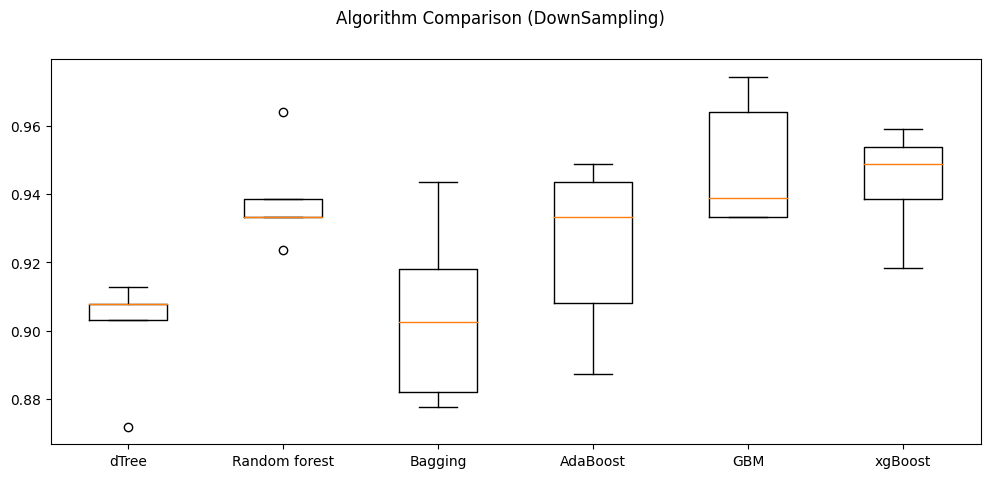

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(12,5))
fig.suptitle("Algorithm Comparison (DownSampling)")
ax = fig.add_subplot(111)
ax.set_xticklabels(names_under)
plt.boxplot(results_under);
plt.show()

* Considering only below models for further evolution based on cv result:
  * GradientBoosting (GBM)
  * AdaBoost
  * Xgboost
* Let check the performance on train (undersample) and validation data set .

In [ ]:
# fit the model
gbm_under = GradientBoostingClassifier(random_state=1)
gbm_under.fit(X_train_under,y_train_under)

# check the performance on training 
gbm_under_train = model_performance_classification_sklearn(gbm_under,X_train_under,y_train_under)
print('Training Performance')
gbm_under_train

Training Performance


,Accuracy,Recall,Precision,F1
0,0.968,0.978,0.959,0.969


In [ ]:
# check the validation performance
gbm_under_val = model_performance_classification_sklearn(gbm_under,X_val,y_val)
print('Validation Performance')
gbm_under_val

Validation Performance


,Accuracy,Recall,Precision,F1
0,0.940,0.963,0.742,0.838


In [ ]:
# fit the model
adaBoost_under = AdaBoostClassifier(random_state=1)
adaBoost_under.fit(X_train_under,y_train_under)

# check the performance on training 
adaBoost_under_train = model_performance_classification_sklearn(adaBoost_under,X_train_under,y_train_under)
print('Training Performance')
adaBoost_under_train

Training Performance


,Accuracy,Recall,Precision,F1
0,0.948,0.953,0.943,0.948


In [ ]:
# check the validation performance
adaBoost_under_val = model_performance_classification_sklearn(adaBoost_under,X_val,y_val)
print('Validation Performance')
adaBoost_under_val

Validation Performance


,Accuracy,Recall,Precision,F1
0,0.936,0.963,0.729,0.830


In [ ]:
# fit the model
xgboost_under = XGBClassifier(random_state=1)
xgboost_under.fit(X_train_under,y_train_under)

# check the performance on training 
xgboost_under_train = model_performance_classification_sklearn(xgboost_under,X_train_under,y_train_under)
print('Training Performance')
xgboost_under_train

Training Performance


,Accuracy,Recall,Precision,F1
0,1.000,1.000,1.000,1.000


In [ ]:
# check the validation performance
xgboost_under_val = model_performance_classification_sklearn(xgboost_under,X_val,y_val)
print('Validation Performance')
xgboost_under_val

Validation Performance


,Accuracy,Recall,Precision,F1
0,0.939,0.954,0.740,0.834


In [ ]:
models_comp_under_df = pd.concat([
    gbm_under_train.T,
    gbm_under_val.T,
    adaBoost_under_train.T,
    adaBoost_under_val.T,
    xgboost_under_train.T,
    xgboost_under_val.T

], axis=1)

models_comp_under_df.columns = [
    'GBM_Train (UnderSampling)',
    'GBM_Val (UnderSampling)',
    'AdaBoost_Train (UnderSampling)',
    'AdaBoost_Val (UnderSampling)',
    'xgboost_Train (UnderSampling)',
    'agboost_Val (UnderSampling)'
]

models_comp_under_df.style.highlight_max(color='green').highlight_min(color='red')

,GBM_Train (UnderSampling),GBM_Val (UnderSampling),AdaBoost_Train (UnderSampling),AdaBoost_Val (UnderSampling),xgboost_Train (UnderSampling),agboost_Val (UnderSampling)
Accuracy,0.968238,0.940276,0.947746,0.938796,1.000000,0.938796
Recall,0.978484,0.963190,0.952869,0.953988,1.000000,0.953988
Precision,0.958835,0.742317,0.943205,0.740476,1.000000,0.740476
F1,0.968560,0.838451,0.948012,0.833780,1.000000,0.833780


* In undersampling , AdaBoosting giving the generalized performance . 

# Comparing all models

* XGBoost - Grid Search (HyperParameter Tuning) giving the generalized performance on train and validation result set.
* GradientBoosting - Under Sampling model also giving generalized performance but less than XGBoost.
* AdBoost - Under Sampling giving the generalized performance but less than XGBoost.
* Based on the problem statement to increase the recall, will choose XGBoost hyper parameter tuned model for production deployment.
* Let's check the performance of the model on Test (unseen) dataset.
* Best model -> XGBoost - GridSearch(Hyperparameter tuning)
* Let's see the feature importance from the xgboost model tuned with GridSearchCV. 

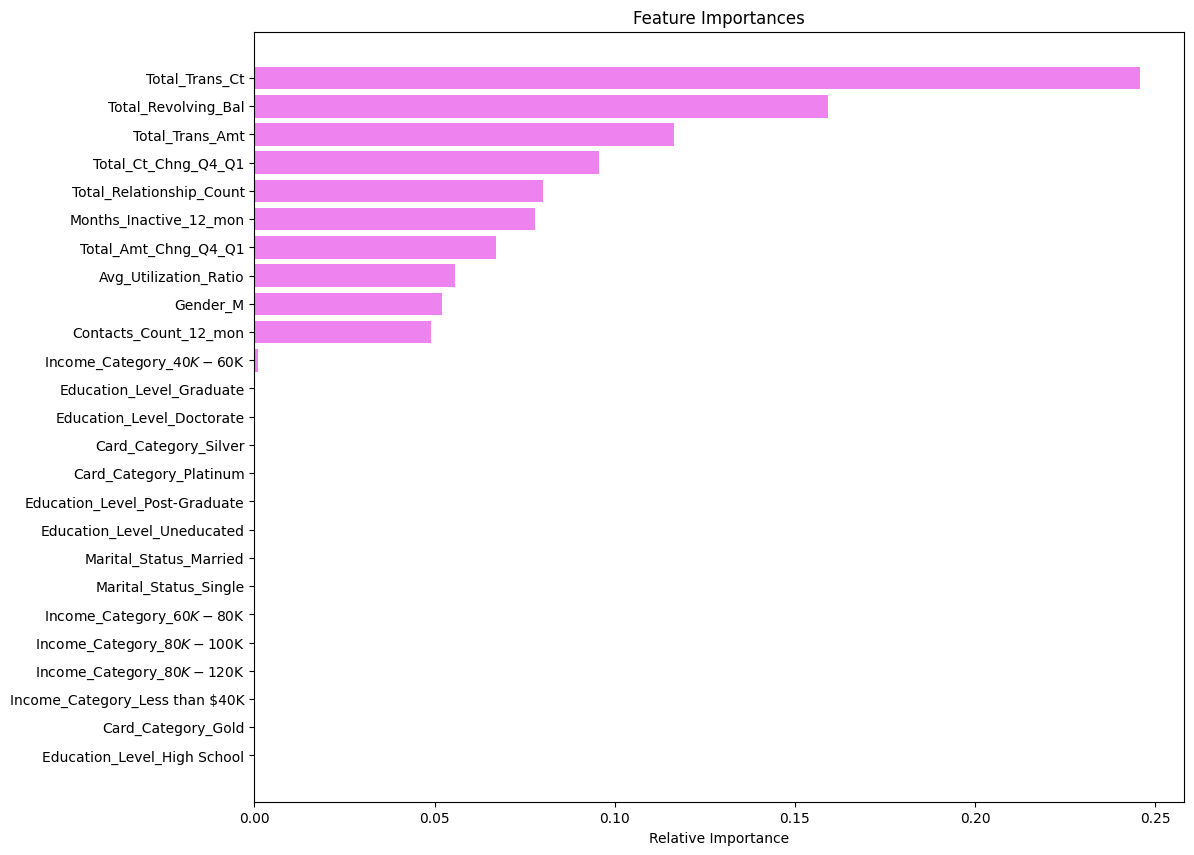

In [21]:
# Feature importance from the xgboost model tuned with GridSearchCV. 
feature_names = X_train.columns
importances = xgboost_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 10))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Total_Trans_Ct is the most important feature which make sense to play a important role to predict that Attrited customer.
* Total_Revolving_Bal is the second important feature to predict Attrited customer.

In [ ]:
xgboost_tuned_test = model_performance_classification_sklearn(xgboost_tuned,X_test,y_test)
print('Test Performace')
xgboost_tuned_test

Test Performace


,Accuracy,Recall,Precision,F1
0,0.896,0.988,0.609,0.754


* XGBoost - GridSearch(Hyperparameter tuning) is performing slightly better on unseen data compare to train and validation data set. hence we will select this model for production deployment.  

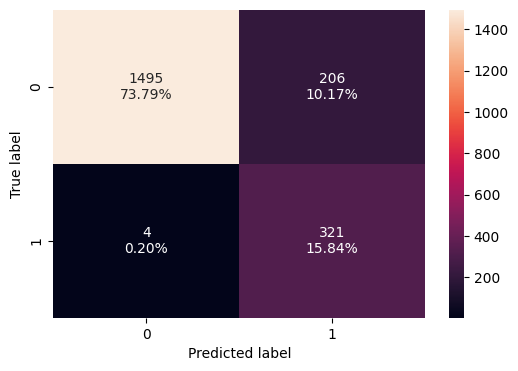

In [ ]:
#confusion metrix
confusion_matrix_sklearn(xgboost_tuned,X_test,y_test)

# ML Pipeline - Production

In [45]:
# Create a copy of the data for production pipeline 
df_bankChurners_prod = pd.read_csv(df_path)

In [46]:
# Target variable map
target_mapper = {'Attrited Customer': 1,'Existing Customer':0 }

# Convert object datatype columns into Categorical

categorical_columns = df_bankChurners_prod.select_dtypes(include='object').columns.to_list()
df_bankChurners_prod[categorical_columns] = df_bankChurners_prod[categorical_columns].astype('category') 

In [58]:
# get the numerical features
numerical_features = df_bankChurners_prod.select_dtypes(include=['int64','float64']).columns
numerical_features

Index(['Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Total_Revolving_Bal', 'Total_Amt_Chng_Q4_Q1',
       'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
       'Avg_Utilization_Ratio'],
      dtype='object')

In [47]:
# columns to drop 
drop_columns = [
    'CLIENTNUM',
    'Customer_Age',
    'Dependent_count',
    'Months_on_book',
    'Credit_Limit',
    'Avg_Open_To_Buy'
    ]
df_bankChurners_prod = df_bankChurners_prod.drop(columns=drop_columns,axis=1)    

In [49]:
# Replace 'abc' with '$80K - $100K'
df_bankChurners_prod['Income_Category'] = df_bankChurners_prod['Income_Category'].apply(lambda x: '$80K - $100K' if x == 'abc' else x)

In [64]:
# Dependent and independent variables 
X = df_bankChurners_prod.drop(columns=['Attrition_Flag'])
y = df_bankChurners_prod['Attrition_Flag'].map(target_mapper) 

In [65]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1, stratify=y
)
print(X_train.shape, X_test.shape)

(7088, 14) (3039, 14)


In [71]:
# creating a transformer for numerical variables, which will apply simple imputer on the numerical variables

numeric_transformer = Pipeline(
    steps = [
        ('imputer', SimpleImputer(missing_values=np.nan,strategy='median'))
    ]
)

# creating a transformer for categorical variables, which will first apply simple imputer and 
# then do one hot encoding for categorical variables
categorical_transformer = Pipeline(
    steps = [
        ('imputer', SimpleImputer(missing_values=np.nan,strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]
)

# combining categorical transformer and numerical transformer using a column transformer
preprosessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer,numerical_features),
        ('cat',categorical_transformer,categorical_cols)
    ],
    remainder='passthrough'
)

In [72]:
# Creating new pipeline with best parameters
model = Pipeline(
    steps = [
        ('pre',preprosessor),
        ('XGBoost',XGBClassifier(
            random_state=1,
            n_estimators = 100,
            colsample_bytree = 0.7,
            learning_rate = 0.1,
            max_depth = 2,
            scale_pos_weight = 10,
            subsample = 0.8
        )
        )
        
        ]
) 
model.fit(X_train,y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Total_Revolving_Bal', 'Total_Amt_Chng_Q4_Q1',
       'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
       'Avg_Utilization...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=2, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=1, ...))])

In [77]:
# predict the model
model.predict(X_test)

array([0, 1, 0, ..., 0, 0, 0])

# Business Recommendations
* Most Important features to decide whether custome will Attrited or not as below:
  * Total_Trans_Ct
  * Total_Revolving_Bal
  * Total_Trans_Amt,
  * Total_Ct_Chng_Q4_Q1
  * Total_Relationship_Count
  * Months_inactive_12_mon
  * Total_Amt_Chng_Q4_Q1
* All of these features are negatively correlated hence lower the values of these features means customer will attrited.
* Bank should focus on these customers for which prediction value is 1 and provide the offers i.e cashback, points on each purchase, interest free EMI to avoid customer to be churn.
* Total transaction count is the most important feature hence bank should increase the credit limit for those customers whose counts are high.
* Bank should start connecting the customers whose monthly inactive counts are keep increasing and having less bank product.      